Imports

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

testfile = '../Resources/disasters.csv'
df = pd.read_csv(testfile)
df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659


Formatting Dataset

In [112]:
# Find Disaster subtype for USA
usa_df = df.loc[(df['Country'] == 'United States of America (the)'),:]
usa_df['Disaster Subtype'].value_counts()

Convective storm                    156
Tropical cyclone                     37
Riverine flood                       34
Forest fire                          19
Flash flood                           8
Drought                               8
Land fire (Brush, Bush, Pasture)      7
Ground movement                       5
Severe winter conditions              2
Cold wave                             2
Heat wave                             2
Extra-tropical storm                  1
Landslide                             1
Lava flow                             1
Mudslide                              1
Name: Disaster Subtype, dtype: int64

In [113]:
# Flood DataFrame
flood_df = usa_df.loc[(df['Disaster Subtype'] == 'Flash flood'),:]
flood_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
700,Flood,Flash flood,Natural,Hydrological,NaN,Brief torrential rain,United States of America (the),New York province,42.2300,-74.95,2007-06-19,2007-06-20,4.0,120.0,NaN,NaN,81.101659
3202,Flood,Flash flood,Natural,Hydrological,NaN,"Heavy rains, strong storm system",United States of America (the),"Orange, Mariposa, Tuolumne, Los Angeles, San F...",NaN,NaN,2014-12-02,2014-12-05,NaN,NaN,NaN,90000.0,92.598981
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822
3342,Flood,Flash flood,Natural,Hydrological,NaN,Torrential rains,United States of America (the),"San Marcos area (Hays district, Texas province...",NaN,NaN,2015-05-24,2015-05-24,16.0,12000.0,NaN,NaN,92.708822
3343,Flood,Flash flood,Natural,Hydrological,NaN,Torrentila rains,United States of America (the),"Hildale town (Washington district, Utah provin...",NaN,NaN,2015-09-14,2015-09-14,19.0,NaN,NaN,2000.0,92.708822


In [114]:
# Finding the top deadliest Flood in US (timeframe)
flood_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822


In [115]:
# Wildfire Dataframe
wildfire_df = usa_df.loc[(df['Disaster Subtype'] == 'Forest fire'),:]
wildfire_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
750,Wildfire,Forest fire,Natural,Climatological,NaN,NaN,United States of America (the),"Alpine, Amador, Calaveras, El Dorado, Mono, Pl...",NaN,NaN,2007-06-24,2007-07-02,NaN,NaN,NaN,NaN,81.101659
751,Wildfire,Forest fire,Natural,Climatological,NaN,NaN,United States of America (the),"Malibu area (Los Angeles district, California ...",NaN,NaN,2007-11-24,2007-11-27,NaN,10000.0,NaN,315000.0,81.101659
846,Wildfire,Forest fire,Natural,Climatological,NaN,"Lightening, drought, wind",United States of America (the),California province,NaN,NaN,2008-06-20,2008-07-09,1.0,NaN,NaN,102000.0,84.215229
1639,Wildfire,Forest fire,Natural,Climatological,NaN,"Drought, high temperatures and strong winds",United States of America (the),Bastrop district (Texas province),NaN,NaN,2011-09-04,2011-09-09,4.0,NaN,NaN,1000000.0,87.984603
2209,Wildfire,Forest fire,Natural,Climatological,NaN,Drought conditions and strong winds,United States of America (the),"Arizona, Minnesota, Texas, Florida provinces",NaN,NaN,2011-05-29,2011-06-23,2.0,NaN,NaN,200000.0,87.984603


In [116]:
# Finding the deadliest wildfire in US (timeframe)
wildfire_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4396,Wildfire,Forest fire,Natural,Climatological,Camp Fire,NaN,United States of America (the),Butte county (North California),NaN,NaN,2018-11-08,2018-11-16,88.0,250000.0,NaN,16500000.0,98.219991


In [117]:
# Hurricane DataFrame
tropical_cyclone_df = usa_df.loc[(df['Disaster Subtype'] == 'Tropical cyclone'),:]
tropical_cyclone_df.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
712,Storm,Tropical cyclone,Natural,Meteorological,Erin,NaN,United States of America (the),"Texas, Oklahoma, Missouri provinces",NaN,NaN,2007-08-16,2007-08-19,7.0,NaN,NaN,NaN,81.101659
775,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Dolly,NaN,United States of America (the),"Panama city beach (Bay district, Florida provi...",NaN,NaN,2008-07-23,2008-07-23,NaN,NaN,NaN,1200000.0,84.215229
795,Storm,Tropical cyclone,Natural,Meteorological,"Tropical Storm ""Fay""",NaN,United States of America (the),"Florida, Georgia, Alabama, Mississippi provinces",NaN,NaN,2008-08-20,2008-08-28,12.0,400.0,NaN,180000.0,84.215229
796,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Ike,NaN,United States of America (the),"Galveston, Brazoria, Harris, Chambers, Jeffers...",35.05,-90.45,2008-09-12,2008-09-16,82.0,200000.0,NaN,30000000.0,84.215229
844,Storm,Tropical cyclone,Natural,Meteorological,"Hurricane ""Gustav""",NaN,United States of America (the),"Louisiana, Mississippi, Texas, Alabama provinces",NaN,NaN,2008-09-01,2008-09-01,43.0,2100000.0,NaN,7000000.0,84.215229


In [118]:
# Finding the top deadliest Hurricanes in US (timeframe)
tropical_cyclone_df.sort_values(by=['Total Deaths'], ascending=False).head(1)

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4306,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Harvey,NaN,United States of America (the),"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,NaN,2017-08-25,2017-08-29,88.0,555000.0,NaN,95000000.0,95.878166


In [119]:
# Create initial variables for tropical, wildfire, and flood dataframes
topcyclone = tropical_cyclone_df.loc[(tropical_cyclone_df["Total Deaths"] == tropical_cyclone_df["Total Deaths"].max()),:]
topwildfire = wildfire_df.loc[(wildfire_df["Total Deaths"] == wildfire_df["Total Deaths"].max()),:]
topflood = flood_df.loc[(flood_df["Total Deaths"] == flood_df["Total Deaths"].max()),:]

frames = [topcyclone,topwildfire,topflood]
top_disasters = pd.concat(frames)
top_disasters

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
4306,Storm,Tropical cyclone,Natural,Meteorological,Hurricane Harvey,NaN,United States of America (the),"Eastern Texas (Rockport, Corpus Chrsti, Port L...",NaN,NaN,2017-08-25,2017-08-29,88.0,555000.0,NaN,95000000.0,95.878166
4396,Wildfire,Forest fire,Natural,Climatological,Camp Fire,NaN,United States of America (the),Butte county (North California),NaN,NaN,2018-11-08,2018-11-16,88.0,250000.0,NaN,16500000.0,98.219991
3291,Flood,Flash flood,Natural,Hydrological,NaN,Heavy rain,United States of America (the),"Texas, Oklahoma, Colorado, Arkansas, Kansas, L...",34.1936,-97.99,2015-05-23,2015-05-30,32.0,12000.0,NaN,2700000.0,92.708822


In [120]:
# Changing data type of top_disasters
top_disasters["start_date"] = top_disasters["start_date"].astype("datetime64")
top_disasters["end_date"] = top_disasters["end_date"].astype("datetime64")

Finding Dates Two Weeks Before and After the Disasters Occur

In [121]:
startdate = (top_disasters["start_date"] - pd.to_timedelta(14,unit = "d")).reset_index(drop = True)
enddate = (top_disasters["end_date"] + pd.to_timedelta(14,unit = "d")).reset_index(drop = True)
print(startdate,enddate)

0   2017-08-11
1   2018-10-25
2   2015-05-09
Name: start_date, dtype: datetime64[ns] 0   2017-09-12
1   2018-11-30
2   2015-06-13
Name: end_date, dtype: datetime64[ns]


Pulling Twitter Data

In [122]:
# Pulling tweet data
samplefile = '../Resources/NA_sample_020.csv'
df2 = pd.read_csv(samplefile)
df2.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


In [123]:
# Changing data type to datetime
df2["created_at"] = df2["created_at"].astype("datetime64")

In [124]:
# Adding date column
df2['date'] = df2['created_at'].dt.date
df2["date"] = df2["date"].astype("datetime64")
df2["date"] = df2["date"].dt.date
df2.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
0,8037902,2018-01-31 20:40:44,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01-31
1,8790126,2018-03-15 21:28:05,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03-15
2,11647260,2018-09-29 14:42:56,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09-29
3,11810796,2018-10-08 22:23:50,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10-08
4,13183104,2018-12-16 11:52:40,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12-16


Finding Tweets two Weeks Before/After Each Disaster

In [125]:
# Create variables for start and end times for tweets
cyclone_tweets = df2.loc[(df2["date"] >= startdate[0]) & (df2["date"] <= enddate[0]), :]
wildfire_tweets = df2.loc[(df2["date"] >= startdate[1]) & (df2["date"] <= enddate[1]), :]
flood_tweets = df2.loc[(df2["date"] >= startdate[2]) & (df2["date"] <= enddate[2]), :]

C:\Users\jrmor\AppData\Local\Temp\ipykernel_19532\2123367906.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  cyclone_tweets = df2.loc[(df2["date"] >= startdate[0]) & (df2["date"] <= enddate[0]), :]
C:\Users\jrmor\AppData\Local\Temp\ipykernel_19532\2123367906.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  wildfire_tweets = df2.loc[(df2["date"] >= startdate[1]) & (df2["date"] <= enddate[1]), :]
C:\Users\jrmor\AppData\Local\Temp\ipykernel_19532\2123367906.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a 

In [126]:
# Displaying results for hurricane
print(startdate[0],enddate[0])
cyclone_tweets.head()

2017-08-11 00:00:00 2017-09-12 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
216,4992854,2017-08-15 17:30:04,38.419250,-82.445154,-0.465921,Global stance,believer,male,not aggressive,2017-08-15
360,5026051,2017-09-10 22:11:53,36.030113,-114.982619,-0.534735,Donald Trump versus Science,believer,male,aggressive,2017-09-10
640,5028248,2017-09-11 02:43:21,29.285810,-81.055890,-0.524462,Global stance,believer,male,not aggressive,2017-09-11
1072,5028195,2017-09-11 02:35:47,43.038900,-87.906470,-0.589799,Ideological Positions on Global Warming,believer,male,aggressive,2017-09-11
1219,5039910,2017-09-12 03:08:16,45.713952,-122.706927,-0.535728,Politics,believer,female,not aggressive,2017-09-12


In [127]:
# Displaying results for wildfire
print(startdate[1],enddate[1])
wildfire_tweets.head()

2018-10-25 00:00:00 2018-11-30 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
108,12184635,2018-11-26 16:55:15,44.108850,-79.122677,-0.028878,Global stance,neutral,male,aggressive,2018-11-26
158,12380621,2018-11-28 16:04:45,34.053691,-118.242766,-0.593402,Global stance,believer,female,not aggressive,2018-11-28
290,12478425,2018-11-30 03:55:32,30.271129,-97.743700,-0.638252,Importance of Human Intervantion,believer,male,not aggressive,2018-11-30
292,12505618,2018-11-30 14:53:32,40.723710,-73.704850,0.715171,Weather Extremes,neutral,female,not aggressive,2018-11-30
320,12447850,2018-11-29 17:19:54,34.052230,-118.243680,0.002881,Donald Trump versus Science,denier,male,not aggressive,2018-11-29


In [128]:
# Displaying results for flood
print(startdate[2],enddate[2])
flood_tweets.head()

2015-05-09 00:00:00 2015-06-13 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
101,2590945,2015-05-28 20:48:13,28.750540,-82.500100,0.155581,Politics,neutral,male,not aggressive,2015-05-28
270,2673100,2015-06-12 04:48:15,42.527412,-92.445318,0.494693,Weather Extremes,believer,male,not aggressive,2015-06-12
308,2590530,2015-05-28 19:45:17,38.895037,-77.036543,-0.523694,Weather Extremes,neutral,female,aggressive,2015-05-28
589,2667006,2015-06-11 02:05:12,53.550140,-113.468710,0.459667,Global stance,believer,female,not aggressive,2015-06-11
608,2584784,2015-05-28 07:28:08,35.084103,-106.650985,-0.514281,Politics,neutral,male,not aggressive,2015-05-28


Finding Tweets Based on 'Weather Extreme' Topic

In [129]:
# cyclone tweets Weather Extreme topic data
print(startdate[0],enddate[0])
cyclone_we = cyclone_tweets.loc[cyclone_tweets['topic'] == "Weather Extremes"]
cyclone_we.head()

2017-08-11 00:00:00 2017-09-12 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
2459,4995252,2017-08-17 20:10:01,39.290882,-76.610759,0.512937,Weather Extremes,neutral,undefined,not aggressive,2017-08-17
2882,4994199,2017-08-16 03:17:02,40.348720,-74.659050,-0.144761,Weather Extremes,believer,female,not aggressive,2017-08-16
3059,5004533,2017-08-28 06:30:21,41.921673,-93.312270,0.402846,Weather Extremes,neutral,undefined,not aggressive,2017-08-28
4890,4997020,2017-08-21 04:22:17,28.542111,-81.379030,-0.317874,Weather Extremes,neutral,male,not aggressive,2017-08-21
6053,5000311,2017-08-25 03:33:48,41.262128,-95.861391,-0.092279,Weather Extremes,denier,male,aggressive,2017-08-25


In [130]:
# Wildfire tweets Weather Extreme topic data
print(startdate[1],enddate[1])
wildfire_we = wildfire_tweets.loc[wildfire_tweets['topic'] == "Weather Extremes"]
wildfire_we.head()

2018-10-25 00:00:00 2018-11-30 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
292,12505618,2018-11-30 14:53:32,40.723710,-73.704850,0.715171,Weather Extremes,neutral,female,not aggressive,2018-11-30
1033,12254231,2018-11-27 03:42:39,26.640628,-81.872308,-0.780085,Weather Extremes,believer,male,not aggressive,2018-11-27
1427,12232710,2018-11-26 23:56:56,34.052230,-118.243680,0.136009,Weather Extremes,believer,male,aggressive,2018-11-26
2025,12354629,2018-11-28 06:17:51,32.750420,-83.500180,-0.379218,Weather Extremes,believer,male,aggressive,2018-11-28
2205,12336341,2018-11-28 01:15:45,29.424600,-98.495141,0.005411,Weather Extremes,believer,male,aggressive,2018-11-28


In [131]:
# Flood tweets Weather Extreme topic data
print(startdate[2],enddate[2])
flood_we = flood_tweets.loc[flood_tweets['topic'] == "Weather Extremes"]
flood_we.head()

2015-05-09 00:00:00 2015-06-13 00:00:00


,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
270,2673100,2015-06-12 04:48:15,42.527412,-92.445318,0.494693,Weather Extremes,believer,male,not aggressive,2015-06-12
308,2590530,2015-05-28 19:45:17,38.895037,-77.036543,-0.523694,Weather Extremes,neutral,female,aggressive,2015-05-28
1525,2671310,2015-06-11 19:05:18,35.084103,-106.650985,0.613703,Weather Extremes,neutral,male,not aggressive,2015-06-11
3129,2554467,2015-05-18 20:26:03,40.800000,-96.666960,0.039903,Weather Extremes,neutral,male,not aggressive,2015-05-18
3275,2666709,2015-06-11 00:31:18,44.500240,-90.000410,0.061085,Weather Extremes,believer,male,not aggressive,2015-06-11


Graphs of Tweet Activity for Top Disasters

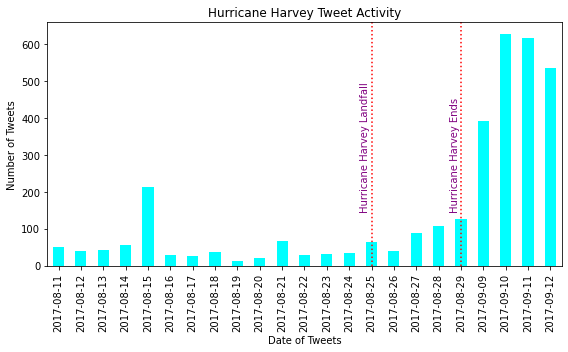

In [132]:
# Hurricane Harvey tweets 2 weeks before/after
new_tc_df = cyclone_tweets.groupby("date").count()
tropical_period = new_tc_df.loc[:,"sentiment"]

tropical_period.plot(kind="bar", figsize=(8,5),color='cyan')
plt.xlabel("Date of Tweets")
plt.ylabel("Number of Tweets")
plt.title("Hurricane Harvey Tweet Activity")

plt.axvline(14, color='red', linestyle=":")
plt.axvline(18, color='red', linestyle=":")
plt.text(13.5, 150, 'Hurricane Harvey Landfall', color='purple', rotation=90)
plt.text(17.5, 150, 'Hurricane Harvey Ends', color='purple', rotation=90)

plt.tight_layout()
plt.savefig('../Images/Q3Hurricane.png')
plt.show()

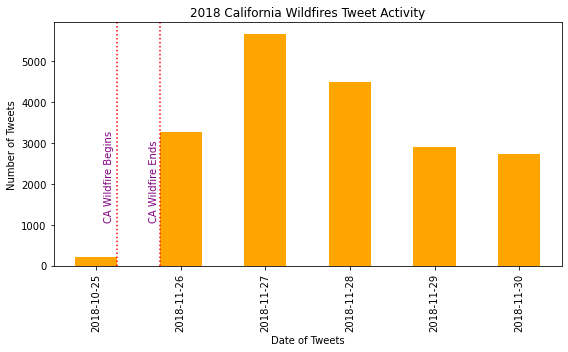

In [133]:
# CA wildfire 2 weeks before/after
new_wf_df = wildfire_tweets.groupby("date").count()
wildfire_period = new_wf_df.loc[:,"sentiment"]

wildfire_period.plot(kind="bar", figsize=(8,5), color='orange')
plt.xlabel("Date of Tweets")
plt.ylabel("Number of Tweets")
plt.title("2018 California Wildfires Tweet Activity")

plt.axvline(.25, color='red', linestyle=":")
plt.axvline(.75, color='red', linestyle=":")
plt.text(.10, 1100, 'CA Wildfire Begins', color='purple', rotation=90)
plt.text(.63, 1100, 'CA Wildfire Ends', color='purple', rotation=90)

plt.tight_layout()
plt.savefig('../Images/Q3Wildfire.png')
plt.show()

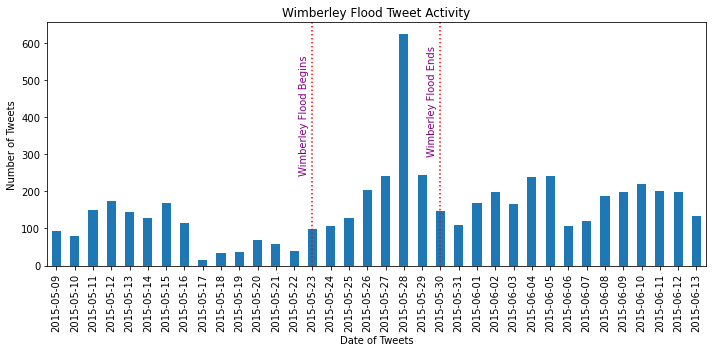

In [134]:
# Wimberley Flood 2 weeks before/after
new_flood_df = flood_tweets.groupby("date").count()
flood_period = new_flood_df.loc[:,"sentiment"]

flood_period.plot(kind="bar", figsize=(10,5))
plt.xlabel("Date of Tweets")
plt.ylabel("Number of Tweets")
plt.title("Wimberley Flood Tweet Activity")

plt.axvline(14, color='red', linestyle=":")
plt.axvline(21, color='red', linestyle=":")
plt.text(13.25, 250, 'Wimberley Flood Begins', color='purple', rotation=90)
plt.text(20.25, 300, 'Wimberley Flood Ends', color='purple', rotation=90)

plt.tight_layout()
plt.savefig('../Images/Q3Flood.png')
plt.show()

Analysis:

Hurrican Harvey:
There is a significant increase of tweets after Hurricane Harvey concluded. During the storm there was an average amount of activity based on all the topics of the data that include climate change. When we break down the graph to just include the topic of 'Weather Extremes' there is an increase in acivity throughout the duration of the storm. There is an upward trend of weather and climate related tweets even two weeks after Hurricane Harvey concludes. As we recall, Hurricane Harvey was one of the more devestating hurricanes in recent memory which continues to show how these storms continue to get stronger over time. 

2018 California Wildfires:
Looking at the data of the 2018 California Wildfire tweet activity it shows a trend up after the wildfires had concluded. Considering we really don't know the severity of a wildfire until it is contained or it has concluded, the tweet data two weeks before the wildfire begins, there is minimum tweet activity across all weather and climate topics on Twitter. It's not until the Wildfire concludes that there is a trend up in tweet acitivity acorss all climate related tweets. 

2015 Wimberley Flood:
The 2015 Wimberley Floods started on May 23, 2015. The data shows that there is a uptick of tweets as the storms and flood trended up as the days went on and the flood began to affect more people. On May 28, there is a significant uptick in tweet activity. Two weeks before the flood occured, there was a decent amount of tweets related to weather and cliumate topics on twitter, with a slight deep days before the flood begins.